In [10]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


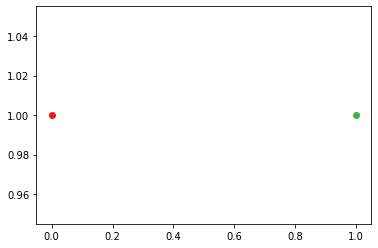

In [22]:
fig, ax =plt.subplots()
ax.scatter(x=0, y=1, c=mpl.cm.Set1.colors[0])
ax.scatter(x=1,y=1, c=mpl.cm.Set1.colors[2])
plt.show()

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def PCA_samples_2D(adata, layer_='FC_over_AG', raw=False):
    """
    runs PCA for visualization on samples
    
    input:  - adata: data object
            - layer_: the layer of rpk counts to use to perform dim reduction
                       - default='FC_over_AG', the fold-change transformed RPK counts
            - raw: if True, then use raw RPK counts to perform dim reduction
                       - default=False
    output: - principalDF: dataframe w/ shape samplesx2, with coordinates of each     sample in principal component space
    """
    pca = PCA(n_components=2)
    if raw is True:
        principalComponents = pca.fit_transform(adata.X)
    else:
        principalComponents = pca.fit_transform(adata.layers[layer_])

    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'], index = adata.obs.index)
    return principalDF

def plot_PCA_samples_2D(adata, layer_='FC_over_AG', raw=False, obs_key=None, print_title=None,
                       obs_colors=None, save=False, save_title=None, save_dir=None, 
                       zoom=False, zoom_xlim=None, zoom_ylim=None):
    """
    Runs dimensionality reduction with PCA and visualizes samples in 2D PCA space.
    
    Input:  - adata: data object
            - layer_: the layer of rpk counts to use to perform dim reduction
                       - default='FC_over_AG', the fold-change transformed RPK counts
            - raw: if True, then use raw RPK counts to perform dim reduction
                       - default=False
            - (optional) obs_key: if you want to color samples by a category, 
                                  obs_key is the category variable in the adata object
                       - eg, obs_key='disease' w/ adata.obs['disease']=['healthy','disease']
            - (optional) obs_colors: if you want to color samples by a category, 
                                     this provides the colors. needs to be a list or 
                                     dict of length equal to the num of category values
                                     in the obs_key command
                       - eg, obs_key='disease', obs_colors=['blue','red']
            - save: boolean directing matplotlib to save the plot, default=False
            - (optional) save_title: title for plot
            - (optional) save_dir: path where plot is saved
    Output: 2D plot of PCA, which is optionally saved
    
    """
    ## run the PCA ##
    PCA_samples_2D(adata, layer_, raw)
    
    ## plot the PCA ## 
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    
    # if grouping
    if obs_key:
        targets = adata.obs[obs_key].values.unique()
        
        #make color dict if not passed
        if not obs_colors: 
            n=len(targets)
            colors=mpl.cm.Set1.colors[:n-1] # Set1 is default palette
        else:
            colors=obs_colors
            
        for target, color in zip(targets,colors):
            indicesToKeep = adata.obs.index[adata.obs.sample_type == target]
            ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'],
                       principalDf.loc[indicesToKeep, 'principal component 2'],
                       c = color,
                       s = 50)
        
        ax.legend(targets)

    #if not grouping
    else:
        ax.scatter(principalDf[:,'principal component 1'],
                   principalDf[:,'principal component 2'], 
                  c = 'r',
                  s= 50)
    
    # if zoom
    if zoom:
        ax.set_xlim(zoom_xlim)
        ax.set_ylim(zoom_ylim)
    
    if print_title:
        ax.set_title(print_title,fontsize=25)
    
    if save:
        plt.savefig(save_dir+save_title)
    
    plt.show()

In [26]:
PCA_samples_2D(adata)

NameError: name 'adata' is not defined